In [16]:
# Assignment 1, Problem 4
# Gradient Method (GM)
# U. Kamilov, Z. Zou
# Computational Imaging Group (CIG), WashU

# Import useful libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
data = sio.loadmat('dataset.mat')

In [18]:
# Access data in the dataset
A, b, xtrue = data['A'], data['b'], data['xtrue']
m, n = A.shape

In [19]:
# Define the function and the gradient (edit this)
evaluateFunc = lambda x: (1/2)*np.linalg.norm(A.dot(x)-b)**2
evaluateGrad = lambda x: A.T.dot(A.dot(x)-b)

In [20]:
# Parameters of the gradient method
xInit = np.zeros((n, 1)) # zero initialization
stepSize = 1/np.linalg.eigh(A.T@A)[0].max() # step-size of the gradient method
maxIter = 200 # maximum number of iterations was 200

In [21]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values
infErrs = np.zeros((maxIter, 1)) # keep track of classification errors

# Run iterations
for iter in range(maxIter):
    # gradient at x
    grad = evaluateGrad(x)
    
    # update (edit this)
    xNext = x - stepSize*grad
    xNext = np.maximum(xNext, 0)
    
    # evaluate the objective
    funcNext = evaluateFunc(xNext)
    
    # store the objective and the classification error
    objVals[iter] = funcNext
    infErrs[iter] = np.linalg.norm(x.ravel()-xtrue.ravel())/np.linalg.norm(xtrue.ravel())
    
    #print('[%d/%d] [step: %.1e] [objective: %.1e]' % (iter, maxIter, stepSize, objVals[iter]))
    
    # update x
    x = xNext

/tmp/ipykernel_4412/215136572.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax2.set_title('cost: %.4e' % objVals[-1])
/tmp/ipykernel_4412/215136572.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax3.set_title('err: %.2e' % infErrs[-1])


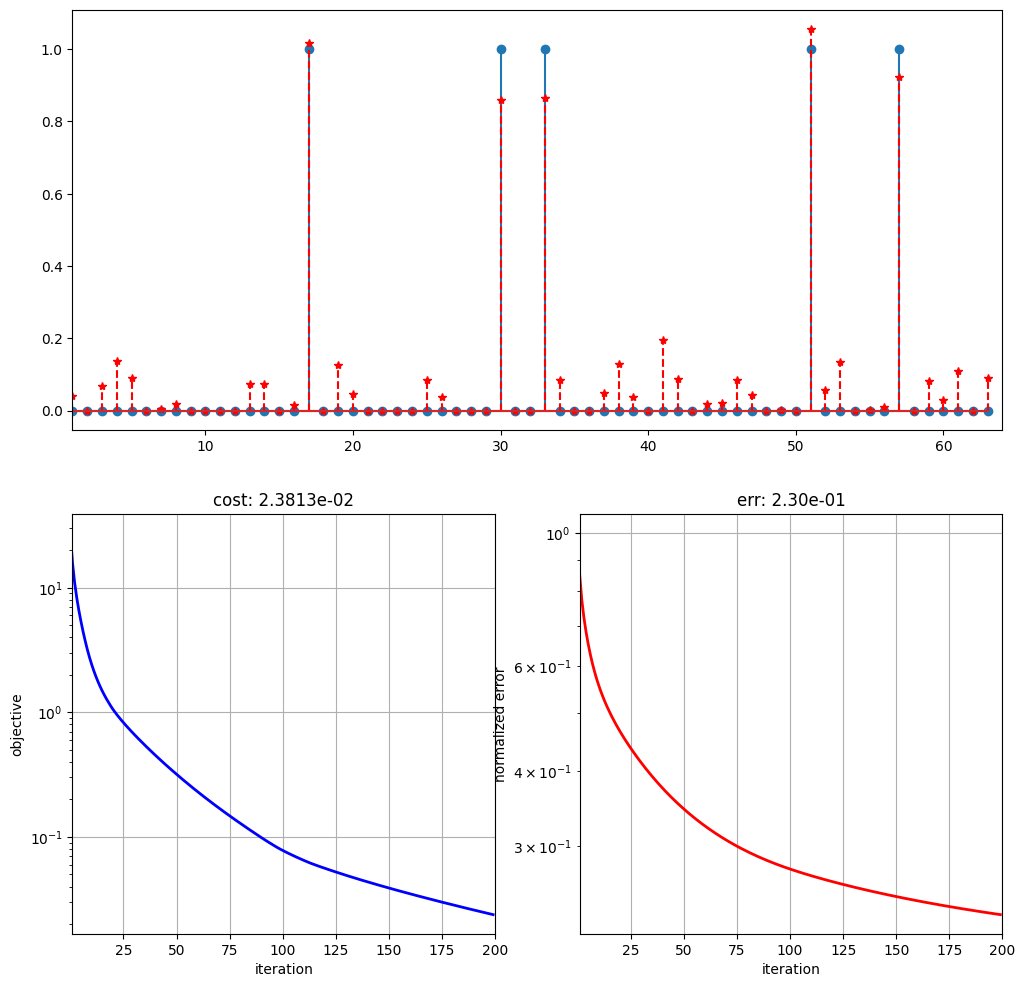

In [22]:
# visualize results
fig = plt.figure(1, figsize=(12, 12))
plt.clf()

# create subplots
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# plot
ax1.stem(xtrue)
ax1.stem(x, 'r--', markerfmt='r*')
ax1.set_xlim([1, n])

ax2.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
ax2.grid(True)
ax2.axis('tight')
ax2.set_xlabel('iteration')
ax2.set_ylabel('objective')
ax2.set_title('cost: %.4e' % objVals[-1])

ax2.set_xlim([1, maxIter])
ax3.semilogy(np.arange(maxIter), infErrs, 'r-', linewidth=2)
ax3.grid(True)
ax3.axis('tight')
ax3.set_xlabel('iteration')
ax3.set_ylabel('normalized error')
ax3.set_title('err: %.2e' % infErrs[-1])
ax3.set_xlim([1, maxIter])

plt.draw()
plt.show()